In [13]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt   
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn import metrics

In [15]:
raw_data = pd.read_excel('../Area_weight_table.xlsx', sheet_name=8)
raw_data.shape

(35, 11)

In [5]:
raw_data = pd.read_excel('../Area_weight_table.xlsx', sheet_name=8)
raw_data.describe()

,Measured Plant Weight,Plant area(cm2)_image1 (top view),Plant area(cm2)_image2 (front view),Predicted Plant Weight,Unnamed: 9
count,35.000000,35.000000,35.0,0.0,0.0
mean,107.412857,283.392286,0.0,NaN,NaN
std,67.924357,190.500940,0.0,NaN,NaN
min,24.960000,50.540000,0.0,NaN,NaN
25%,46.720000,129.550000,0.0,NaN,NaN
50%,93.240000,232.570000,0.0,NaN,NaN
75%,146.285000,356.300000,0.0,NaN,NaN
max,277.640000,784.060000,0.0,NaN,NaN


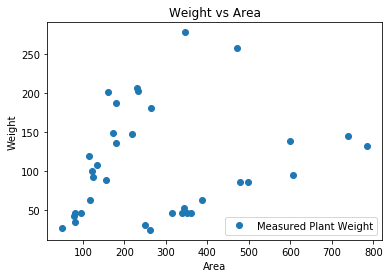

In [6]:
# plot raw data
raw_data.plot(x='Plant area(cm2)_image1 (top view)', y='Measured Plant Weight', style='o')  
plt.title('Weight vs Area')  
plt.xlabel('Area')  
plt.ylabel('Weight')  
plt.show()

In [7]:
# divide variables into attributes(independent variables) and labels(dependent variables)
X = raw_data['Plant area(cm2)_image1 (top view)'].values.reshape(-1,1)
Y = raw_data['Measured Plant Weight'].values.reshape(-1,1)
# split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [8]:
# fit the model and train
regressor = LinearRegression()  
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# Predict data
Y_pred = regressor.predict(X_test)
# Compare predicted values with actual values
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
print(df)

   Actual   Predicted
0  202.24   97.851237
1   93.24   88.996847
2   63.66   88.474414
3  201.00   91.961392
4  180.83  100.508371
5   34.96   85.446098
6   86.15  119.614394


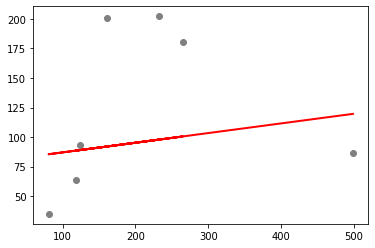

In [10]:
# Plot predicted test data
plt.scatter(X_test, Y_test,  color='gray')
plt.plot(X_test, Y_pred, color='red', linewidth=2)
plt.show()

In [11]:
# Metrics for model performance
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('Root Mean Squared Log Error:', np.sqrt(mean_squared_log_error( Y_test, Y_pred )))

Mean Absolute Error: 58.108151316405106
Mean Squared Error: 4791.495329155342
Root Mean Squared Error: 69.2206279165058
Root Mean Squared Log Error: 0.5909051493498866
